<a href="https://colab.research.google.com/github/shubhamkumar0/Multivariate-Time-series-VAR/blob/master/VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts 
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.base.datetools import dates_from_str
import matplotlib
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
from google.colab import files
uploaded = files.upload()



Saving ETH-USD.csv to ETH-USD.csv


In [0]:
mdata = pd.read_csv("ETH-USD.csv")
mdata=mdata.drop(['Close','High','Low'], axis=1)

In [96]:
mdata['Date'] = mdata['Date'].astype('datetime64[ns]')
mdata.set_index('Date', drop = True, inplace = True)
mdata

,Open,Adj Close,Volume
Date,,,
2015-08-06,0.674700,3.000000,371
2015-08-07,3.000000,1.200000,1438
2015-08-08,1.200000,1.200000,0
2015-08-09,1.200000,1.200000,0
2015-08-10,1.200000,0.990000,7419
2015-08-11,0.990000,1.290000,2376
2015-08-12,1.290000,1.880000,4923
2015-08-13,1.880000,1.790000,11070
2015-08-14,1.790000,1.790000,14812


In [97]:
mdata.shape


(1328, 3)

In [98]:
data = mdata.diff().dropna()
data

,Open,Adj Close,Volume
Date,,,
2015-08-07,2.325300,-1.800000,1067.0
2015-08-08,-1.800000,0.000000,-1438.0
2015-08-09,0.000000,0.000000,0.0
2015-08-10,0.000000,-0.210000,7419.0
2015-08-11,-0.210000,0.300000,-5043.0
2015-08-12,0.300000,0.590000,2547.0
2015-08-13,0.590000,-0.090000,6147.0
2015-08-14,-0.090000,0.000000,3742.0
2015-08-15,0.000000,-0.420000,-4018.0


In [99]:
data.shape

(1327, 3)

In [107]:
coin_result = ts.coint(data['Open'], data['Adj Close'],return_results=False)#todo
coin_result


(-6.6214642199843405,
 6.625701104095638e-08,
 array([-3.90471842, -3.3407418 , -3.04765004]))

In [108]:
var = VAR(data.values / data.values.std(0))
var.select_order(15)

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0      -0.02979     -0.01795       0.9706     -0.02535
1        -11.52       -11.47    9.948e-06       -11.50
2        -11.98       -11.89    6.295e-06       -11.94
3        -12.13       -12.01    5.399e-06       -12.08
4        -12.28       -12.13    4.625e-06       -12.23
5        -12.40       -12.21    4.125e-06       -12.33
6        -12.45       -12.23    3.905e-06       -12.37
7        -12.57       -12.31    3.466e-06       -12.47
8        -12.64       -12.34    3.239e-06       -12.53
9        -12.65       -12.32    3.196e-06       -12.53
10       -12.74       -12.38    2.924e-06       -12.60
11       -12.83       -12.42    2.688e-06       -12.68
12       -12.89       -12.45    2.523e-06       -12.73
13       -12.90       -12.43    2.495e-06       -12.72
14       -12.95       -12.44    2.388e-06       -12.75
15      -1

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


{'aic': 15, 'bic': 15, 'fpe': 15, 'hqic': 15}

In [109]:
results = var.fit(maxlags=15, ic='aic')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


In [110]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 30, Mar, 2019
Time:                     10:19:00
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -12.4627
Nobs:                     1312.00    HQIC:                  -12.8031
Log likelihood:           3085.95    FPE:                2.24373e-06
AIC:                     -13.0075    Det(Omega_mle):     2.02336e-06
--------------------------------------------------------------------
Results for equation y1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         -0.000002         0.000057           -0.031           0.975
L1.y1         -0.909040         0.027651          -32.875           0.000
L1.y2          1.000427         0.000067        14987.506           0.000
L1.y3          0.

In [111]:
np.linalg.eigvals(results.sigma_u_mle)

array([4.07027307e-06, 8.66552048e-01, 5.15411271e-01])

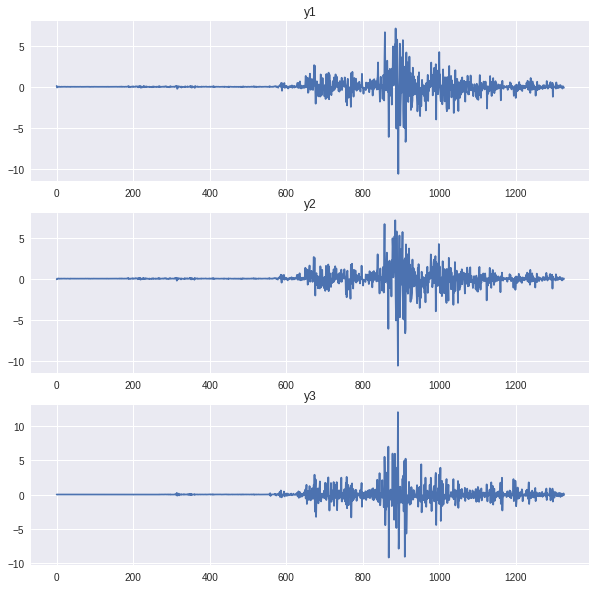

In [112]:
results.plot()


In [113]:
lag_order = results.k_ar
lag_order

15

In [114]:
results.forecast(data.values[-lag_order:], 15)

array([[   19688.26680466,  2470711.93636139,  4989039.62540256],
       [ 2472781.89284286, -8671255.19259757,  2589619.14883626],
       [-8721046.48128116, -1660721.21111581,  3028866.20516364],
       [-1619857.99799338,  3893997.49842296, -4778283.32365585],
       [ 3868455.60122075,  -873238.22934057, -2961022.29871348],
       [ -862538.69216717,  3040639.21663517,  5806431.90576932],
       [ 3037882.81423329, -1361526.4040356 , -2863525.0819048 ],
       [-1358906.35961704, -5098769.8599193 ,  5957474.45543511],
       [-5097378.56127023,  -767566.88336845, -1695274.14649747],
       [ -773315.16163884,  5148775.45587194, -4217200.44104889],
       [ 5163220.06546245, -3123213.86163729,  -926051.42058331],
       [-3137042.76264261,  1996241.25035048,  1025093.14510928],
       [ 2010725.70185044,   -76882.75857487, -1129725.6798437 ],
       [  -88532.43054552,   440838.01202007,   483826.36167978],
       [  447106.01646222,   -41511.93111868,  2954620.39527399]])

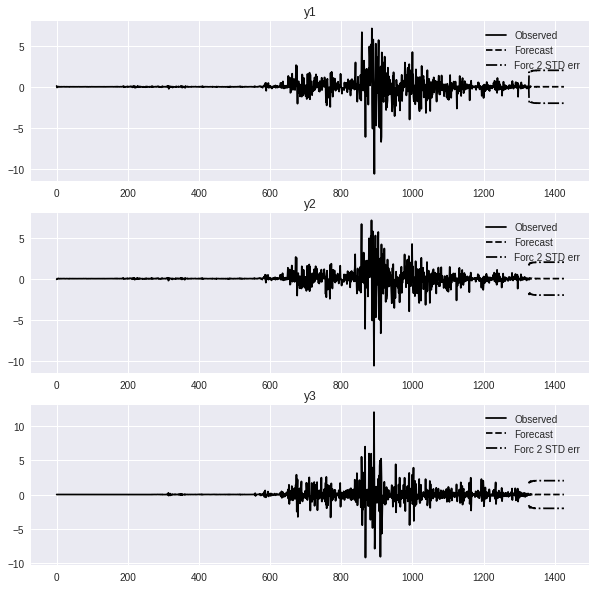

In [116]:
results.plot_forecast(100)